In [1]:
data = [{'not':85 , 'kardes':4, 'ders':'mat'},
        {'not':70 , 'kardes':3, 'ders':'ing'},
        {'not':65 , 'kardes':3, 'ders':'mat'},
        {'not':60 , 'kardes':2, 'ders':'fiz'}
        ] 

In [2]:
data

[{'not': 85, 'kardes': 4, 'ders': 'mat'},
 {'not': 70, 'kardes': 3, 'ders': 'ing'},
 {'not': 65, 'kardes': 3, 'ders': 'mat'},
 {'not': 60, 'kardes': 2, 'ders': 'fiz'}]

In [3]:
#{'mat':1 , 'ing' : 2 , 'fiz' : 3} # This is wrong way to change categoric to numeric. Because 1<2<3 .

In [4]:
from sklearn.feature_extraction import DictVectorizer # This class working for change categoric to numeric.

In [5]:
vek = DictVectorizer(sparse = False , dtype = int)

In [6]:
vek.fit_transform(data) # This is the true way to change categoric to numeric.

array([[ 0,  0,  1,  4, 85],
       [ 0,  1,  0,  3, 70],
       [ 0,  0,  1,  3, 65],
       [ 1,  0,  0,  2, 60]])

In [7]:
vek.get_feature_names()

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['ders=fiz', 'ders=ing', 'ders=mat', 'kardes', 'not']

In [8]:
vek = DictVectorizer(sparse = True , dtype = int) # If there is too many categoric columns, so sparse True better.
vek.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

In [9]:
data2 = ['weather good',
         'good person',
         'weather bad']

In [10]:
from sklearn.feature_extraction.text import CountVectorizer # To change text to numeric. 

In [11]:
vek = CountVectorizer()

In [12]:
X = vek.fit_transform(data2)
X

<3x4 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [13]:
import pandas as pd

In [14]:
pd.DataFrame(X.toarray(), columns = vek.get_feature_names())

,bad,good,person,weather
0,0,1,0,1
1,0,1,1,0
2,1,0,0,1


In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
x = np.array([1,2,3,4,5])
y = np.array([5,3,1,2,7])

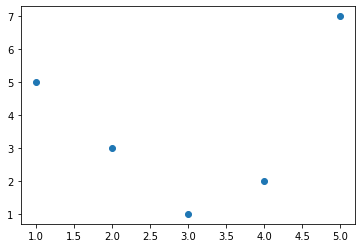

In [17]:
plt.scatter(x,y);

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
X = x[:,np.newaxis] # We change x datas to new X datas with new one more axis.

In [20]:
lr = LinearRegression().fit(X,y)

In [21]:
y_preds = lr.predict(X)

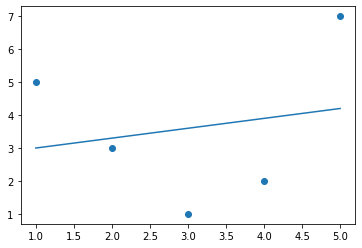

In [22]:
plt.scatter(x,y)
plt.plot(x,y_preds)

In [42]:
y_preds.shape

(5,)

In [40]:
x.shape

(5,)

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
pol = PolynomialFeatures(degree = 3, include_bias=False)

In [26]:
X2 = pol.fit_transform(X)
X2

array([[  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.]])

In [27]:
lr2 = LinearRegression().fit(X2,y)

In [28]:
y_preds2 = lr2.predict(X2)

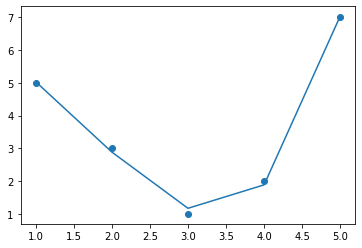

In [29]:
plt.scatter(x,y)
plt.plot(x,y_preds2);

In [30]:
# Preprocessing about nan values with sklearn.

In [31]:
from numpy import nan

In [32]:
X = np.array([[1,nan,3],
              [5,6,9],
              [4,5,2],
              [4,6,nan],
              {9,8,1}])
y = np.array([10,13,-2,7,-6])

C:\Users\EmincanY\AppData\Local\Temp\ipykernel_5012\276539790.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[1,nan,3],


In [33]:
X

array([list([1, nan, 3]), list([5, 6, 9]), list([4, 5, 2]),
       list([4, 6, nan]), {8, 9, 1}], dtype=object)

In [34]:
from sklearn.impute import SimpleImputer

In [35]:
imp = SimpleImputer(strategy='mean')

In [36]:
X2 = imp.fit([[1, 2], [np.nan, 3], [7, 6]])
X2

SimpleImputer()

In [37]:
X2 = imp.transform(X) # I'll learn this later.

ValueError: setting an array element with a sequence.